In [1]:
import json
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
chroms = [str(x) for x in range(1, 6)]
famsizes = [3, 4, 5, 6]
param_file = '../parameter_estimation/ihart_famsize_ind_pass_params.json'

In [3]:
with open(param_file, 'r') as f:
    params = json.load(f)

In [4]:
famkey_to_sample = dict()
for k in params.keys():
    if '.' in k:
        pieces = k.split('.')
        if pieces[3] == '3' and pieces[0] != 'AU1325':
            famkey_to_sample[pieces[0]] = pieces[-1]
print(famkey_to_sample)

{'AU0033': 'AU003305', 'AU0092': 'AU009205', 'AU0137': 'AU013706', 'AU0176': 'AU017603', 'AU0235': 'AU023506', 'AU0285': 'AU028503', 'AU0316': 'AU0316301', 'AU0379': 'AU037904', 'AU0432': 'AU043206', 'AU0625': 'AU062504', 'AU0678': 'AU067806', 'AU0958': 'AU0958304', 'AU1038': 'AU1038302', 'AU1088': 'AU1088301', 'AU1163': 'AU1163305', 'AU1215': 'AU1215301', 'AU1317': 'AU1317301', 'AU1347': 'AU1347301', 'AU1356': 'AU1356301', 'AU1408': 'AU1408303', 'AU1417': 'AU1417303', 'AU1443': 'AU1443304', 'AU1466': 'AU1466301', 'AU1482': 'AU1482304', 'AU1542': 'AU1542303', 'AU1549': 'AU1549302', 'AU1560': 'AU1560304', 'AU1578': 'AU1578304', 'AU1608': 'AU1608302', 'AU1642': 'AU1642302', 'AU1726': 'AU1726303', 'AU1748': 'AU1748304', 'AU1781': 'AU1781302', 'AU1806': 'AU1806303', 'AU1858': 'AU1858303', 'AU1981': 'AU1981304', 'AU2337': 'AU2337303', 'AU2865': 'AU2865303', 'AU3348': 'AU3348303', 'AU3861': 'AU3861304', 'AU3934': 'AU3934304', 'AU4093': 'AU4093302', 'AU4237': 'AU4237304'}


In [22]:
def remove_double_deletions(deletions):
    doublekey_to_deletions = defaultdict(list)
    for d in deletions:
        #doublekey = (d['family'], d['is_mat'])
        doublekey = (d['family'],)
        doublekey_to_deletions[doublekey].append(d)
        
    return [ds[0] for ds in doublekey_to_deletions.values() if len(ds) == 1]

In [23]:
del_to_key = lambda d, sample: (d['family'].split('.')[0], d['is_mat'])

family_to_trans = defaultdict(list)
family_to_notrans = defaultdict(list)

for chrom in chroms:
    
    with open('../deletions_ihart_famsize/chr.%s.collections.json' % chrom, 'r') as f:
        collections = json.load(f)
    
    for c in collections:
        del_to_famsizes_trans = defaultdict(list)
        del_to_famsizes_notrans = defaultdict(list)
        for d in remove_double_deletions(c['matches']):
            famkey = d['family'].split('.')[0]
            if famkey in famkey_to_sample:
                if famkey_to_sample[famkey] in d['trans']:
                    del_to_famsizes_trans[del_to_key(d, famkey_to_sample[famkey])].append((d['family_size']-2, len(d['trans'])))
                else:
                    del_to_famsizes_notrans[del_to_key(d, famkey_to_sample[famkey])].append((d['family_size']-2, len(d['notrans'])))

        for d, fs in del_to_famsizes_trans.items():
            family_to_trans[d[0]].append(tuple(sorted(fs)))

        for d, fs in del_to_famsizes_notrans.items():
            family_to_notrans[d[0]].append(tuple(sorted(fs)))


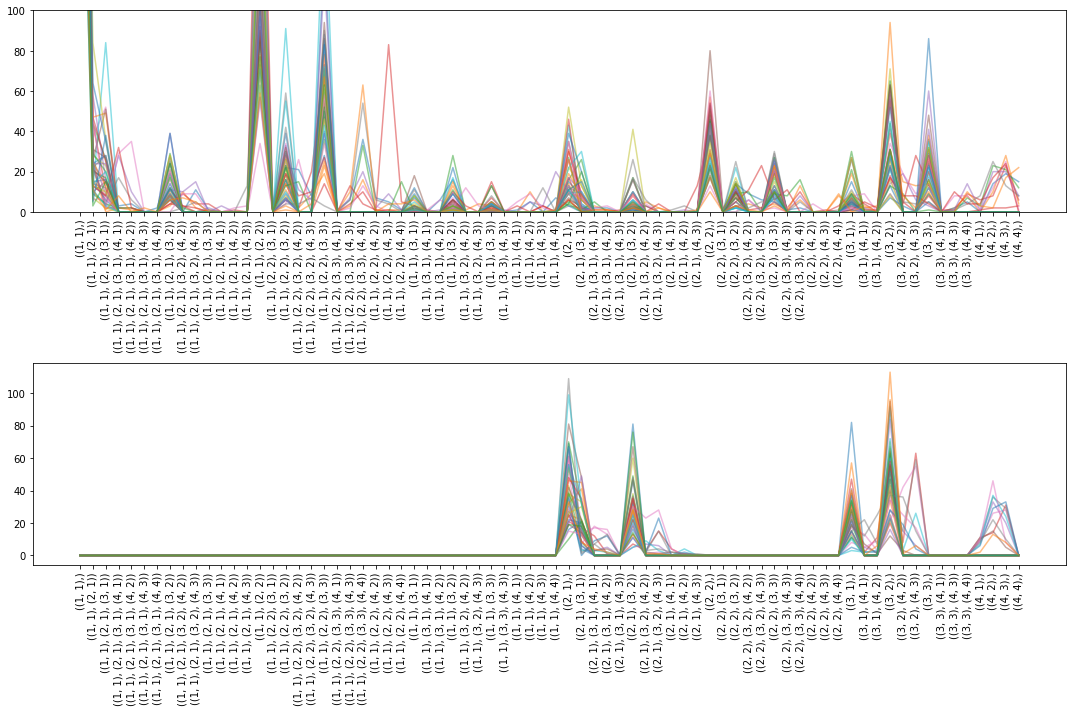

In [30]:
plt.figure(figsize=(15, 10))

cs = sorted(set(sum(list(family_to_trans.values()), [])))
#print(cs)

plt.subplot(2, 1, 1)
for family, combos in family_to_trans.items():
    counts = Counter(combos)
    #if (6,) in counts:
    plt.plot([counts[c] for c in cs], alpha=0.5)
    #print([(counts[(3,4,5,6)] + counts[(4,5,6)])/len([c for c in combos if j in c]) for j in famsizes])
plt.xticks(range(len(cs)), cs, rotation=90)
plt.ylim([0, 100])

plt.subplot(2, 1, 2)
for family, combos in family_to_notrans.items():
    counts = Counter(combos)
    #if (6,) in combos:
    plt.plot([counts[c] for c in cs], alpha=0.5)
plt.xticks(range(len(cs)), cs, rotation=90)

plt.tight_layout()
plt.show()

//anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide


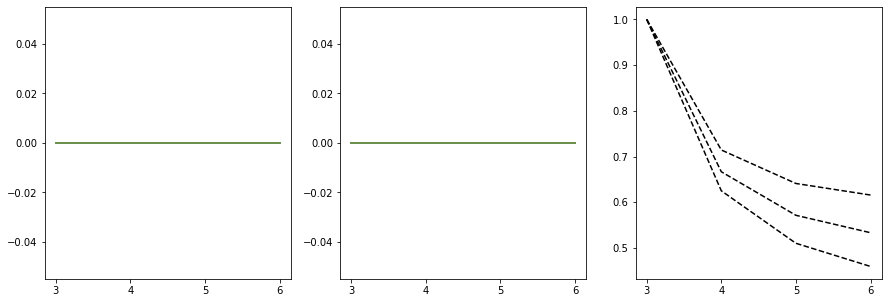

In [26]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
for family, combos in family_to_trans.items():
    #if (6, ) in combos:
    d = [len([c for c in combos if j in c]) for j in famsizes]
    plt.plot(d, alpha=0.5)
    #print(d[-1]/d[0])
plt.xticks(range(len(famsizes)), famsizes)
        
plt.subplot(1, 3, 2)
for family, combos in family_to_notrans.items():
    #if (6,) in combos:
    d = [len([c for c in combos if j in c]) for j in famsizes]
    plt.plot(d, alpha=0.5)
    #print(d[-1]/d[0])
plt.xticks(range(len(famsizes)), famsizes)

plt.subplot(1, 3, 3)
for family, combos in family_to_trans.items():
    #if (6, ) in combos:
    d = np.array([len([c for c in combos if j in c]) for j in famsizes])
    e = np.array([len([c for c in family_to_notrans[family] if j in c]) for j in famsizes])
    plt.plot(d/(d+e), alpha=0.5)
    #print(d[-1]/d[0])
plt.plot(range(len(famsizes)), 0.5/(1-0.5**np.arange(1, 5)), color='black', linestyle='--')
plt.plot(range(len(famsizes)), 0.4/(1-0.6**np.arange(1, 5)), color='black', linestyle='--')
plt.plot(range(len(famsizes)), 0.6/(1-0.4**np.arange(1, 5)), color='black', linestyle='--')

plt.xticks(range(len(famsizes)), famsizes)
plt.show()